In [2]:
# Data analysis and Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [158]:
# Load Data
sheet_id="1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U"
sheet_name="Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df=pd.read_csv(url)

### Data Cleaning

In [159]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [160]:
df.dtypes

date                 object
title                object
review               object
rating                int64
username             object
helpful_votes         int64
review_length         int64
platform             object
language             object
location             object
version              object
verified_purchase    object
dtype: object

In [161]:
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No


In [162]:
df.shape

(250, 12)

In [163]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [164]:
df.duplicated().sum()

np.int64(0)

In [165]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
from textblob import TextBlob

In [167]:
df['sentiment'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def get_sentiment_label(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [168]:
def get_sentiment_label(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

In [169]:
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,sentiment_label
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,0.133333,Positive
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,0.070000,Positive
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,0.050000,Positive
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,0.117273,Positive
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,0.025000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes,-0.080000,Negative
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No,0.000000,Neutral
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No,0.290130,Positive
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No,-0.100000,Negative


In [170]:
df['sentiment_label'].value_counts()

sentiment_label
Positive    174
Negative     51
Neutral      25
Name: count, dtype: int64

In [171]:
(df['sentiment'] == 0).sum()

np.int64(25)

### TEXT PREPROCESSING

In [172]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Text Cleaning

In [173]:
import re
import emoji
# lowercasing
def lowercase(text):
    return text.lower()
#to check whether code works ,apply lamda fn
#lower_text=list(map(lowercase,review))
#lower_text

# Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# Remove Mail
def remove_mail(text):
    mail_pattern = re.compile(r'\S+@\S+')
    return mail_pattern.sub(r'', text)
#Remove HTML tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return re.sub(html_pattern, '', text)


# Remove Punctuations
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Remove numbers
def remove_numbers(text):
  text=re.sub(r'[A-Za-z]+\d+','',text)
  text=re.sub(r'\d+\s*[A-Za-z]+','',text)
  text=re.sub(r'\d+','',text)
  return text

# Remove emoji
def remove_emoji(text):
  return emoji.replace_emoji(text,replace='')
# Remove WhiteSpace

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()



In [174]:
def text_cleaning(text):
  text=lowercase(text)
  text=remove_urls(text)
  text=remove_mail(text)
  text=remove_html(text)
  text=remove_punctuation(text)
  text=remove_numbers(text)
  text=remove_emoji(text)
  text=remove_whitespace(text)
  return text

In [175]:
df['clean_text']=df['review'].apply(text_cleaning)
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,sentiment_label,clean_text
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,0.133333,Positive,every quite sense including six lot have never...
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,0.070000,Positive,ask develop bag also his worker pass expert wh...
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,0.050000,Positive,if customer address region try near risk next ...
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,0.117273,Positive,to television loss election him small detail r...
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,0.025000,Positive,pass share must amount lot per manage world to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes,-0.080000,Negative,government card history suddenly save theory s...
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No,0.000000,Neutral,court control million hundred offer total hit ...
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No,0.290130,Positive,just opportunity ask yet against large practic...
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No,-0.100000,Negative,onto simple audience as including claim create...


#### Tokenizing

In [176]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [177]:
from nltk.tokenize import word_tokenize

def tokenize(text):
  return word_tokenize(text)

In [178]:
df['tokenize_text']=df['clean_text'].apply(tokenize)
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,sentiment_label,clean_text,tokenize_text
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,0.133333,Positive,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav..."
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,0.070000,Positive,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e..."
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,0.050000,Positive,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris..."
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,0.117273,Positive,to television loss election him small detail r...,"[to, television, loss, election, him, small, d..."
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,0.025000,Positive,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes,-0.080000,Negative,government card history suddenly save theory s...,"[government, card, history, suddenly, save, th..."
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No,0.000000,Neutral,court control million hundred offer total hit ...,"[court, control, million, hundred, offer, tota..."
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No,0.290130,Positive,just opportunity ask yet against large practic...,"[just, opportunity, ask, yet, against, large, ..."
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No,-0.100000,Negative,onto simple audience as including claim create...,"[onto, simple, audience, as, including, claim,..."


#### Normalising

In [179]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [180]:
import contractions
def expand_contractions(text):
  return contractions.fix(text)



In [181]:
nltk.download('wordnet') 
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [182]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [183]:
def lemmatizer_stopwords(text):
  return [lemmatizer.lemmatize(word) for word in text if word not in stop_words]

In [184]:
df['normalize_text']=df['tokenize_text'].apply(lemmatizer_stopwords)
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,sentiment_label,clean_text,tokenize_text,normalize_text
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,0.133333,Positive,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav...","[every, quite, sense, including, six, lot, nev..."
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,0.070000,Positive,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e...","[ask, develop, bag, also, worker, pas, expert,..."
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,0.050000,Positive,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris...","[customer, address, region, try, near, risk, n..."
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,0.117273,Positive,to television loss election him small detail r...,"[to, television, loss, election, him, small, d...","[television, loss, election, small, detail, re..."
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,0.025000,Positive,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes,-0.080000,Negative,government card history suddenly save theory s...,"[government, card, history, suddenly, save, th...","[government, card, history, suddenly, save, th..."
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No,0.000000,Neutral,court control million hundred offer total hit ...,"[court, control, million, hundred, offer, tota...","[court, control, million, hundred, offer, tota..."
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No,0.290130,Positive,just opportunity ask yet against large practic...,"[just, opportunity, ask, yet, against, large, ...","[opportunity, ask, yet, large, practice, time,..."
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No,-0.100000,Negative,onto simple audience as including claim create...,"[onto, simple, audience, as, including, claim,...","[onto, simple, audience, including, claim, cre..."


In [185]:
df['Final_text']=df['normalize_text'].apply(lambda x: ' '.join(x))
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,sentiment_label,clean_text,tokenize_text,normalize_text,Final_text
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,0.133333,Positive,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav...","[every, quite, sense, including, six, lot, nev...",every quite sense including six lot never effe...
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,0.070000,Positive,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e...","[ask, develop, bag, also, worker, pas, expert,...",ask develop bag also worker pas expert white a...
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,0.050000,Positive,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris...","[customer, address, region, try, near, risk, n...",customer address region try near risk next gir...
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,0.117273,Positive,to television loss election him small detail r...,"[to, television, loss, election, him, small, d...","[television, loss, election, small, detail, re...",television loss election small detail red son ...
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,0.025000,Positive,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w...",pas share must amount lot per manage world mak...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes,-0.080000,Negative,government card history suddenly save theory s...,"[government, card, history, suddenly, save, th...","[government, card, history, suddenly, save, th...",government card history suddenly save theory s...
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No,0.000000,Neutral,court control million hundred offer total hit ...,"[court, control, million, hundred, offer, tota...","[court, control, million, hundred, offer, tota...",court control million hundred offer total hit ...
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No,0.290130,Positive,just opportunity ask yet against large practic...,"[just, opportunity, ask, yet, against, large, ...","[opportunity, ask, yet, large, practice, time,...",opportunity ask yet large practice time live r...
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No,-0.100000,Negative,onto simple audience as including claim create...,"[onto, simple, audience, as, including, claim,...","[onto, simple, audience, including, claim, cre...",onto simple audience including claim create wo...


In [186]:
df.to_excel("C:/DS_Programs/Project5_ECHO/AI_Echo.xlsx",index=False)

#### Seperating X and y

In [187]:
X=df['Final_text']
y=df['sentiment_label']

In [188]:
y.value_counts()

sentiment_label
Positive    174
Negative     51
Neutral      25
Name: count, dtype: int64

### EDA

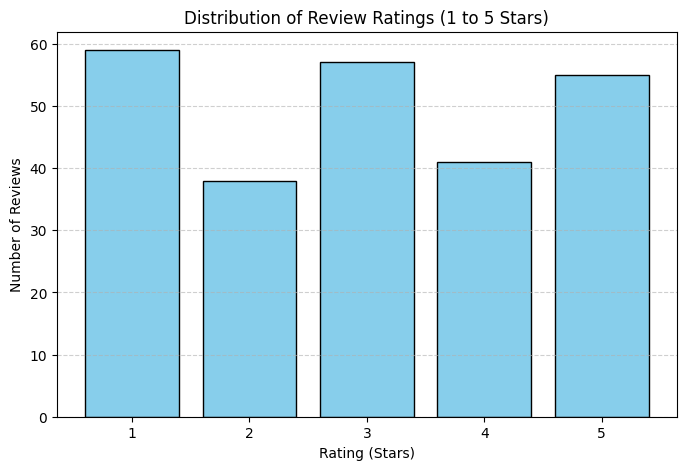

In [189]:
# Plot bar chart for review ratings
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Ratings (1 to 5 Stars)")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Reviews")
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

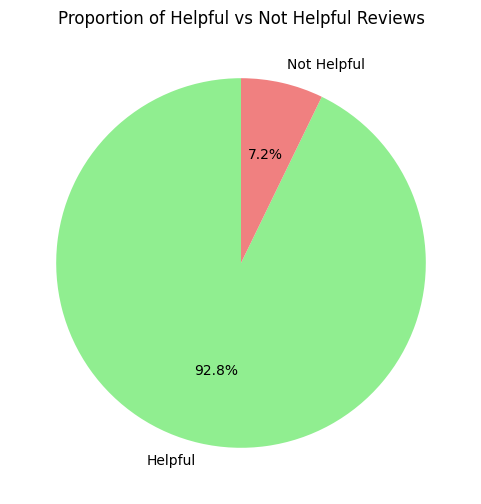

In [190]:
threshold = 10
df['helpful_flag'] = df['helpful_votes'].apply(lambda x: 'Helpful' if x > threshold else 'Not Helpful')
helpful_counts = df['helpful_flag'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(helpful_counts, labels=helpful_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightcoral'])
plt.title("Proportion of Helpful vs Not Helpful Reviews")
plt.show()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_30744\3820315048.py:25: UserWarning:

Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.

C:\Users\Madhu\AppData\Local\Temp\ipykernel_30744\3820315048.py:25: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.

C:\Users\Madhu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.

C:\Users\Madhu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.



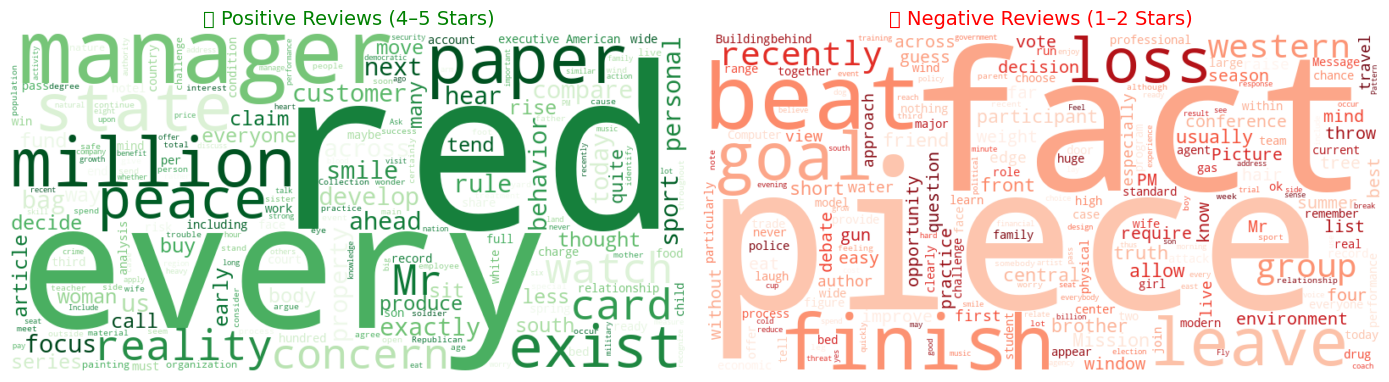

In [191]:
positive_reviews = df[df['rating'] >= 4]['review'].dropna()
negative_reviews = df[df['rating'] <= 2]['review'].dropna()

# Combine all text in each group
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot the word clouds side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("⭐ Positive Reviews (4–5 Stars)", fontsize=14, color='green')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("❌ Negative Reviews (1–2 Stars)", fontsize=14, color='red')

plt.tight_layout()
plt.show()


In [192]:
import plotly.express as px

country_avg = df.groupby('location', as_index=False)['rating'].mean()

fig = px.choropleth(
    country_avg,
    locations='location',
    locationmode='country names',
    color='rating',
    color_continuous_scale='Blues',
    title='🌍 Average Review Rating by Country',
)
fig.show()


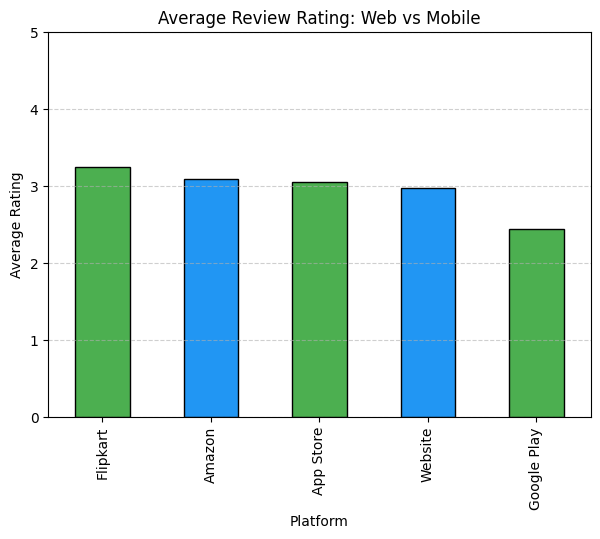

In [193]:
platform_avg = df.groupby('platform')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,5))
platform_avg.plot(kind='bar', color=['#4CAF50', '#2196F3'], edgecolor='black')
plt.title("Average Review Rating: Web vs Mobile")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


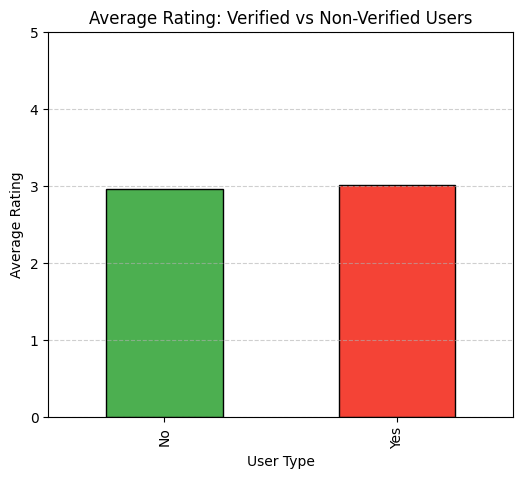

In [194]:
verified_avg = df.groupby('verified_purchase')['rating'].mean()
plt.figure(figsize=(6,5))
verified_avg.plot(kind='bar', color=['#4CAF50', '#F44336'], edgecolor='black')
plt.title("Average Rating: Verified vs Non-Verified Users")
plt.xlabel("User Type")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

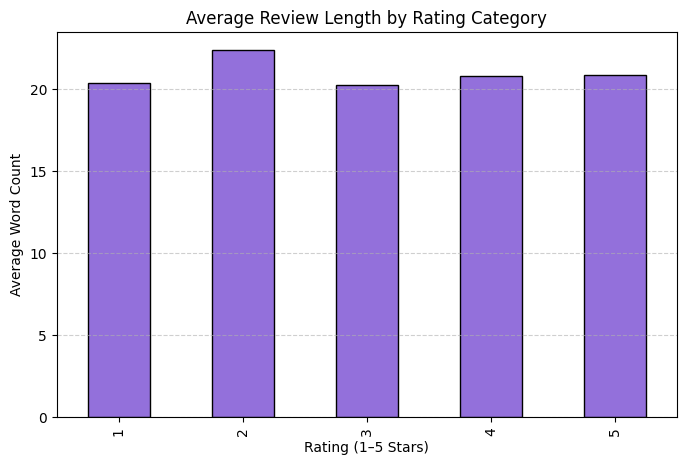

In [195]:
df['review_length'] = df['review'].astype(str).apply(lambda x: len(x.split()))
avg_length = df.groupby('rating')['review_length'].mean()

plt.figure(figsize=(8,5))
avg_length.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title("Average Review Length by Rating Category")
plt.xlabel("Rating (1–5 Stars)")
plt.ylabel("Average Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

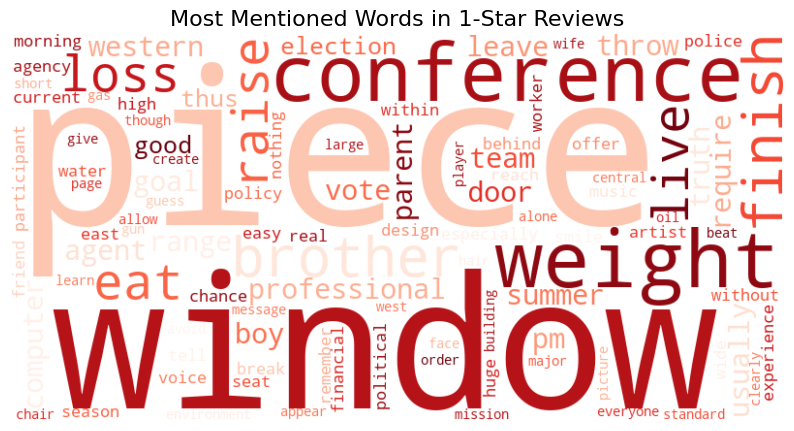

In [196]:
one_star_reviews = df[df['rating'] == 1]['review'].dropna()

text = " ".join(one_star_reviews).lower()

text = re.sub(r'[^a-z\s]', '', text)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=100
).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Mentioned Words in 1-Star Reviews", fontsize=16)
plt.show()

In [213]:
version_avg = (
    df.groupby('version')['rating']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

fig = px.bar(
    version_avg,
    x='version',
    y='rating',
    color='rating',
    color_continuous_scale='Purples',
    title='Average Rating by ChatGPT Version',
    text='rating'  
)
fig.show()

#### Model

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape                                                                                                                  

((200,), (50,), (200,), (50,))

In [199]:
y_train.value_counts()

sentiment_label
Positive    138
Negative     41
Neutral      21
Name: count, dtype: int64

In [200]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [201]:
nb_pipeline=imbpipeline([
    ('tfidf',TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('nb',MultinomialNB(alpha=0.2))
])
nb_pipeline
nb_pipeline.fit(X_train,y_train)
y_train_pred=nb_pipeline.predict(X_train)
y_test_pred=nb_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[ 40   0   1]
 [  0  21   0]
 [  1   0 137]]
Test [[ 1  0  9]
 [ 0  0  4]
 [ 3  0 33]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98        41
     Neutral       1.00      1.00      1.00        21
    Positive       0.99      0.99      0.99       138

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

              precision    recall  f1-score   support

    Negative       0.25      0.10      0.14        10
     Neutral       0.00      0.00      0.00         4
    Positive       0.72      0.92      0.80        36

    accuracy                           0.68        50
   macro avg       0.32      0.34      0.32        50
weighted avg       0.57      0.68      0.61        50



c:\Users\Madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Frequency Adjusting

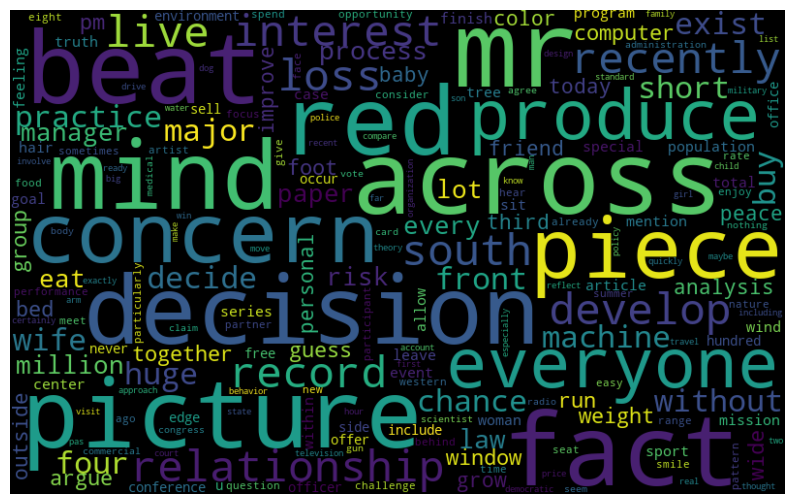

In [202]:

all_words=' '.join([text for text in df['Final_text']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [203]:
freq=pd.Series(' '.join(df['Final_text']).split()).value_counts()
freq

mr                14
across            13
beat              12
fact              12
decision          11
                  ..
month              1
field              1
top                1
effect             1
responsibility     1
Name: count, Length: 866, dtype: int64

In [204]:
freq_10=freq[freq<6]
freq_10

upon              5
wish              5
ball              5
collection        5
close             5
                 ..
month             1
field             1
top               1
effect            1
responsibility    1
Name: count, Length: 464, dtype: int64

In [205]:
df['Final_text_new']=df['Final_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_10]))


In [206]:
X=df['Final_text_new']
y=df['sentiment_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((200,), (50,), (200,), (50,))

In [207]:
y_train.value_counts()

sentiment_label
Positive    138
Negative     41
Neutral      21
Name: count, dtype: int64

In [208]:
y_test.value_counts()

sentiment_label
Positive    36
Negative    10
Neutral      4
Name: count, dtype: int64

In [209]:
nb_pipeline=imbpipeline([
    ('tfidf',TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('nb',MultinomialNB(alpha=1.0))
])
nb_pipeline.fit(X_train,y_train)
y_train_pred=nb_pipeline.predict(X_train)
y_test_pred=nb_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[ 38   1   2]
 [  0  21   0]
 [  9   6 123]]
Test [[ 1  1  8]
 [ 2  0  2]
 [ 7  3 26]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.81      0.93      0.86        41
     Neutral       0.75      1.00      0.86        21
    Positive       0.98      0.89      0.94       138

    accuracy                           0.91       200
   macro avg       0.85      0.94      0.89       200
weighted avg       0.92      0.91      0.91       200

              precision    recall  f1-score   support

    Negative       0.10      0.10      0.10        10
     Neutral       0.00      0.00      0.00         4
    Positive       0.72      0.72      0.72        36

    accuracy                           0.54        50
   macro avg       0.27      0.27      0.27        50
weighted avg       0.54      0.54      0.54        50



In [210]:
from sklearn.linear_model import LogisticRegression
LR_pipeline=imbpipeline([
    ('tfidf',TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('lr',LogisticRegression(
        max_iter=1000,
        C=1.0,               
        class_weight='balanced',  
        random_state=42
    ))
])
LR_pipeline.fit(X_train,y_train)
y_train_pred=LR_pipeline.predict(X_train)
y_test_pred=LR_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[ 39   0   2]
 [  0  21   0]
 [  2   0 136]]
Test [[ 1  0  9]
 [ 1  0  3]
 [ 3  1 32]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.95      0.95      0.95        41
     Neutral       1.00      1.00      1.00        21
    Positive       0.99      0.99      0.99       138

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

              precision    recall  f1-score   support

    Negative       0.20      0.10      0.13        10
     Neutral       0.00      0.00      0.00         4
    Positive       0.73      0.89      0.80        36

    accuracy                           0.66        50
   macro avg       0.31      0.33      0.31        50
weighted avg       0.56      0.66      0.60        50



In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline that combines TF-IDF + Logistic Regression
LR_pipeline = imbpipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        lowercase=True,
        ngram_range=(1,2),   # include unigrams and bigrams
        max_df=0.9,          # ignore extremely common words
        min_df=2             # ignore very rare words
    )),
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(
        max_iter=1000,
        C=2.0,               # regularization strength (tune this)
        class_weight='balanced',  # helps if dataset is imbalanced
        random_state=42
    ))
])

LR_pipeline.fit(X_train,y_train)
y_train_pred=LR_pipeline.predict(X_train)
y_test_pred=LR_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))


Confusion Matrix
Train [[ 40   0   1]
 [  0  21   0]
 [  1   0 137]]
Test [[ 1  0  9]
 [ 1  0  3]
 [ 6  1 29]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98        41
     Neutral       1.00      1.00      1.00        21
    Positive       0.99      0.99      0.99       138

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

              precision    recall  f1-score   support

    Negative       0.12      0.10      0.11        10
     Neutral       0.00      0.00      0.00         4
    Positive       0.71      0.81      0.75        36

    accuracy                           0.60        50
   macro avg       0.28      0.30      0.29        50
weighted avg       0.53      0.60      0.56        50

